(veiled-resentment)=
# Veiled Resentment
 
History, at its core, is a sprawling record of trial and error, a messy ledger of human attempts to navigate the world. What we perceive as progress is often just the residue of what endured, the scraps that managed to outlast their alternatives. It’s not a straight line of improvement but a jagged, stumbling path where countless experiments—ideas, systems, inventions—were tossed into the fire of reality. Most fizzled out, forgotten in the ash heap of time, while a few flickered long enough to catch and spread. We call it progress because we’re staring at the survivors, the winners that stuck around long enough to shape the story.

```{figure} https://upload.wikimedia.org/wikipedia/commons/4/49/%22The_School_of_Athens%22_by_Raffaello_Sanzio_da_Urbino.jpg
---
width: 70%
height: 70%
name: School of Athens
---
_Inheritence, Heir, Brand, Tribe, Religion_. We've described these stages of societal history. We're discussing brand: an agent exerts an ecological loss function that some consider "creative destruction". Branding and Mismatch Repair? Jacob?
```
 

This survival bias warps our view. Take the steam engine: Watt’s design is celebrated as a triumph of ingenuity, a cornerstone of the Industrial Revolution. But behind it lies a graveyard of clunky, inefficient contraptions that coughed and sputtered their way to obsolescence. We don’t immortalize the flops—Newcomen’s earlier, less practical engine gets a footnote if it’s lucky. The same goes for political systems. Democracy’s staying power makes it look inevitable, but it’s just one of many governance experiments that didn’t collapse under its own weight. Monarchies, theocracies, and tribal councils littered the past; some thrived for centuries before fading. We spotlight what worked and shrug off what didn’t, as if the outcome was predestined.

Even cultural milestones follow this pattern. Shakespeare’s plays are hailed as timeless, but he wasn’t the only playwright scribbling in Elizabethan England. His contemporaries—Kyd, Marlowe—produced works that dazzled in their day, yet they’re now sidelights to the Bard’s canon. Survival bias crowns the victors and erases the also-rans, leaving us to marvel at a polished narrative that hides the chaos underneath. The Renaissance itself, that supposed explosion of art and reason, was less a unified leap forward than a pileup of trial runs, with plenty of mediocre frescoes and half-baked philosophies lost to history’s editing room floor.

Science, too, is a testament to this ruthless selection. Newton’s laws seem like a brilliant leap, but they emerged from a stew of wrong turns—alchemists chasing gold, astronomers clinging to geocentrism. For every breakthrough, there were dozens of dead ends, discarded not because they lacked effort but because they didn’t fit the world as it revealed itself. Einstein refined Newton, not because Newton failed, but because the surviving framework begged for tweaking. Progress isn’t a march; it’s a filter, straining out the misfires until something usable remains.
So when we trace history’s arc, we’re [not seeing](https://en.wikipedia.org/wiki/Trial_and_error) a grand design unfold. We’re peering through a lens that magnifies what lasted and blurs what didn’t. The illusion of advancement comes from our knack for cherry-picking the hits and ignoring the misses. Every step forward rests on a mountain of stumbles, and what we call the past is just the stuff that didn’t break badly enough to disappear. If that’s progress, it’s less a victory parade than a survivor’s tale—gritty, haphazard, and blind to where it’s headed next.

 

 
 

 

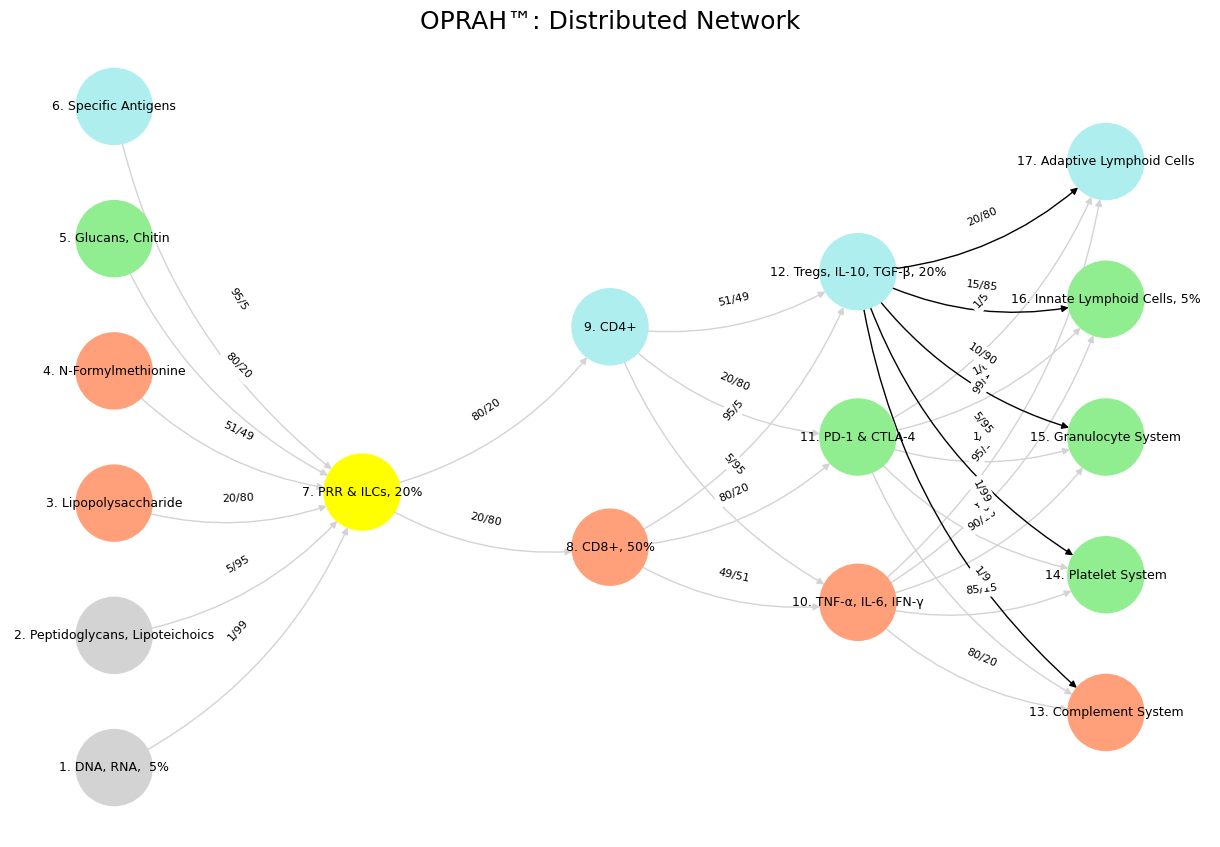

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers
def define_layers():
    return {
        'Suis': ['DNA, RNA,  5%', 'Peptidoglycans, Lipoteichoics', 'Lipopolysaccharide', 'N-Formylmethionine', "Glucans, Chitin", 'Specific Antigens'],
        'Voir': ['PRR & ILCs, 20%'],  
        'Choisis': ['CD8+, 50%', 'CD4+'],  
        'Deviens': ['TNF-α, IL-6, IFN-γ', 'PD-1 & CTLA-4', 'Tregs, IL-10, TGF-β, 20%'],  
        "M'èléve": ['Complement System', 'Platelet System', 'Granulocyte System', 'Innate Lymphoid Cells, 5%', 'Adaptive Lymphoid Cells']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['PRR & ILCs, 20%'],  
        'paleturquoise': ['Specific Antigens', 'CD4+', 'Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'],  
        'lightgreen': ["Glucans, Chitin", 'PD-1 & CTLA-4', 'Platelet System', 'Innate Lymphoid Cells, 5%', 'Granulocyte System'],  
        'lightsalmon': ['Lipopolysaccharide', 'N-Formylmethionine', 'CD8+, 50%', 'TNF-α, IL-6, IFN-γ', 'Complement System'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('DNA, RNA,  5%', 'PRR & ILCs, 20%'): '1/99',
        ('Peptidoglycans, Lipoteichoics', 'PRR & ILCs, 20%'): '5/95',
        ('Lipopolysaccharide', 'PRR & ILCs, 20%'): '20/80',
        ('N-Formylmethionine', 'PRR & ILCs, 20%'): '51/49',
        ("Glucans, Chitin", 'PRR & ILCs, 20%'): '80/20',
        ('Specific Antigens', 'PRR & ILCs, 20%'): '95/5',
        ('PRR & ILCs, 20%', 'CD8+, 50%'): '20/80',
        ('PRR & ILCs, 20%', 'CD4+'): '80/20',
        ('CD8+, 50%', 'TNF-α, IL-6, IFN-γ'): '49/51',
        ('CD8+, 50%', 'PD-1 & CTLA-4'): '80/20',
        ('CD8+, 50%', 'Tregs, IL-10, TGF-β, 20%'): '95/5',
        ('CD4+', 'TNF-α, IL-6, IFN-γ'): '5/95',
        ('CD4+', 'PD-1 & CTLA-4'): '20/80',
        ('CD4+', 'Tregs, IL-10, TGF-β, 20%'): '51/49',
        ('TNF-α, IL-6, IFN-γ', 'Complement System'): '80/20',
        ('TNF-α, IL-6, IFN-γ', 'Platelet System'): '85/15',
        ('TNF-α, IL-6, IFN-γ', 'Granulocyte System'): '90/10',
        ('TNF-α, IL-6, IFN-γ', 'Innate Lymphoid Cells, 5%'): '95/5',
        ('TNF-α, IL-6, IFN-γ', 'Adaptive Lymphoid Cells'): '99/1',
        ('PD-1 & CTLA-4', 'Complement System'): '1/9',
        ('PD-1 & CTLA-4', 'Platelet System'): '1/8',
        ('PD-1 & CTLA-4', 'Granulocyte System'): '1/7',
        ('PD-1 & CTLA-4', 'Innate Lymphoid Cells, 5%'): '1/6',
        ('PD-1 & CTLA-4', 'Adaptive Lymphoid Cells'): '1/5',
        ('Tregs, IL-10, TGF-β, 20%', 'Complement System'): '1/99',
        ('Tregs, IL-10, TGF-β, 20%', 'Platelet System'): '5/95',
        ('Tregs, IL-10, TGF-β, 20%', 'Granulocyte System'): '10/90',
        ('Tregs, IL-10, TGF-β, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('Tregs, IL-10, TGF-β, 20%', 'Complement System'): '1/99',
        ('Tregs, IL-10, TGF-β, 20%', 'Platelet System'): '5/95',
        ('Tregs, IL-10, TGF-β, 20%', 'Granulocyte System'): '10/90',
        ('Tregs, IL-10, TGF-β, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™: Distributed Network", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_Plato, Bacon, and Aristotle_. Our dear philosophers map onto the neural architecture of thought, with Plato embodying the Default Mode Network (DMN)—the introspective, abstract generator of ideal forms—while Bacon, the relentless empiricist, activates the Task-Positive Network (TPN), grounding knowledge in experiment and observation. Aristotle, the great synthesizer, orchestrates the Salience Network (SN), dynamically toggling between the two, his pragmatism mirroring the thalamocortical gating that dictates shifts between passive reflection and active engagement. The salience node jostling—where competing stimuli wrest for cognitive primacy—reflects philosophy’s neural reality, where dialectical tensions are not mere abstractions but tangible, circuit-driven contests for attention, grounding even the loftiest of ideas in the anatomy of the mind.
```






#